In [40]:
#import libraries
import tensorflow as tf

In [41]:
from keras.preprocessing.image import ImageDataGenerator

In [42]:
#data_preprocessing
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [43]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [44]:
#Building CNN model
#Initializing
cnn = tf.keras.models.Sequential()

In [45]:
#convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape =[64,64,3]))

In [46]:
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [47]:
#Add 1 more layer
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [48]:
#flatten
cnn.add(tf.keras.layers.Flatten())

In [49]:
#full connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [50]:
#add output layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [53]:
#compile the model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [71]:
#Train the model
history=cnn.fit(x = train_generator, validation_data = validation_generator, epochs =25)

Epoch 1/25
250/250 [==============================] - 95s 378ms/step - loss: 0.3872 - accuracy: 0.8235 - val_loss: 0.4540 - val_accuracy: 0.7910
Epoch 2/25
250/250 [==============================] - 57s 229ms/step - loss: 0.3698 - accuracy: 0.8331 - val_loss: 0.4177 - val_accuracy: 0.8075
Epoch 3/25
250/250 [==============================] - 56s 225ms/step - loss: 0.3635 - accuracy: 0.8361 - val_loss: 0.4429 - val_accuracy: 0.7940
Epoch 4/25
250/250 [==============================] - 56s 222ms/step - loss: 0.3521 - accuracy: 0.8414 - val_loss: 0.4395 - val_accuracy: 0.7935
Epoch 5/25
250/250 [==============================] - 63s 251ms/step - loss: 0.3415 - accuracy: 0.8519 - val_loss: 0.4312 - val_accuracy: 0.8005
Epoch 6/25
250/250 [==============================] - 64s 256ms/step - loss: 0.3322 - accuracy: 0.8535 - val_loss: 0.4402 - val_accuracy: 0.7995
Epoch 7/25
250/250 [==============================] - 65s 261ms/step - loss: 0.3083 - accuracy: 0.8676 - val_loss: 0.4271 - val_ac

In [76]:
#make single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset/single_prediction/predict2.jpg", target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [77]:
prediction

'dog'

In [78]:
import matplotlib.pyplot as plt

In [79]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


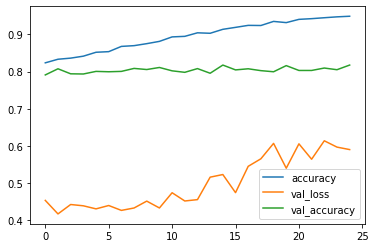

In [88]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()